# Requirements

In [2]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Add as many imports as you need.

## Blood Pressure Analysis


# Dataset Description

## Attributes

* id - patient identifier
* age - patient age
* height - patient height in cm
* weight - patient weight in kg
* blood sugar - patient blood sugar level
* Cholesterol - patient cholesterol level
* triglyceride - patient triglyceride level
* HDL - patient high-density lipoprotein cholesterol level
* LDL - patient low-density lipoprotein cholesterol level
* hemoglobin - patient hemoglobin level
* Urine protein - patinet protein in urine level
* serum creatinine - patient serum creatinine level
* AST - patient aspartate aminotransferase level
* ALT - patient Alanine transaminase level
* Gtp - patient Guanosine-5'-triphosphate level
* dental caries - does patient have dental caries

### Target variable
* blood - patient systolic blood pressure

# Read the dataset

In [7]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('blood_pressure_data.csv')
data.head()

,id,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,NaN,NaN,180.0,65.0,70.0,NaN,149.0,NaN,NaN,87.0,13.9,1.0,NaN,19.0,NaN,NaN,No,112.0
1,57468.0,7/5/1979,150.0,50.0,88.0,92.0,219.0,LOW,NaN,137.0,13.2,NaN,0.6,26.0,17.0,NaN,No,138.0
2,55209.0,11/27/1954,175.0,75.0,NaN,NaN,217.0,NORMAL,50.0,142.0,NaN,1.0,0.8,22.0,22.0,NaN,No,137.0
3,3335.0,9/13/1984,160.0,NaN,NaN,100.0,160.0,HiGH,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,No,133.0
4,70782.0,8/15/1984,170.0,NaN,68.0,99.0,176.0,LOW,NaN,96.0,13.8,1.0,0.9,33.0,NaN,11.0,No,NaN


Explore the dataset using visualizations of your choice.

In [9]:
# Write your code here. Add as many boxes as you need.

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [11]:
# Write your code here. Add as many boxes as you need.
data.isnull().sum()

id                  2672
age                 2688
height(cm)          2627
weight(kg)          2556
relaxation          2575
blood sugar         2562
Cholesterol         2614
triglyceride        1356
HDL                 2609
LDL                 2642
hemoglobin          2583
Urine protein       2525
serum creatinine    2567
AST                 2573
ALT                 2584
Gtp                 2589
dental caries          0
blood pressure      2523
dtype: int64

In [12]:
percent = data.isnull().sum() / len(data) * 100
percent

id                  26.72
age                 26.88
height(cm)          26.27
weight(kg)          25.56
relaxation          25.75
blood sugar         25.62
Cholesterol         26.14
triglyceride        13.56
HDL                 26.09
LDL                 26.42
hemoglobin          25.83
Urine protein       25.25
serum creatinine    25.67
AST                 25.73
ALT                 25.84
Gtp                 25.89
dental caries        0.00
blood pressure      25.23
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

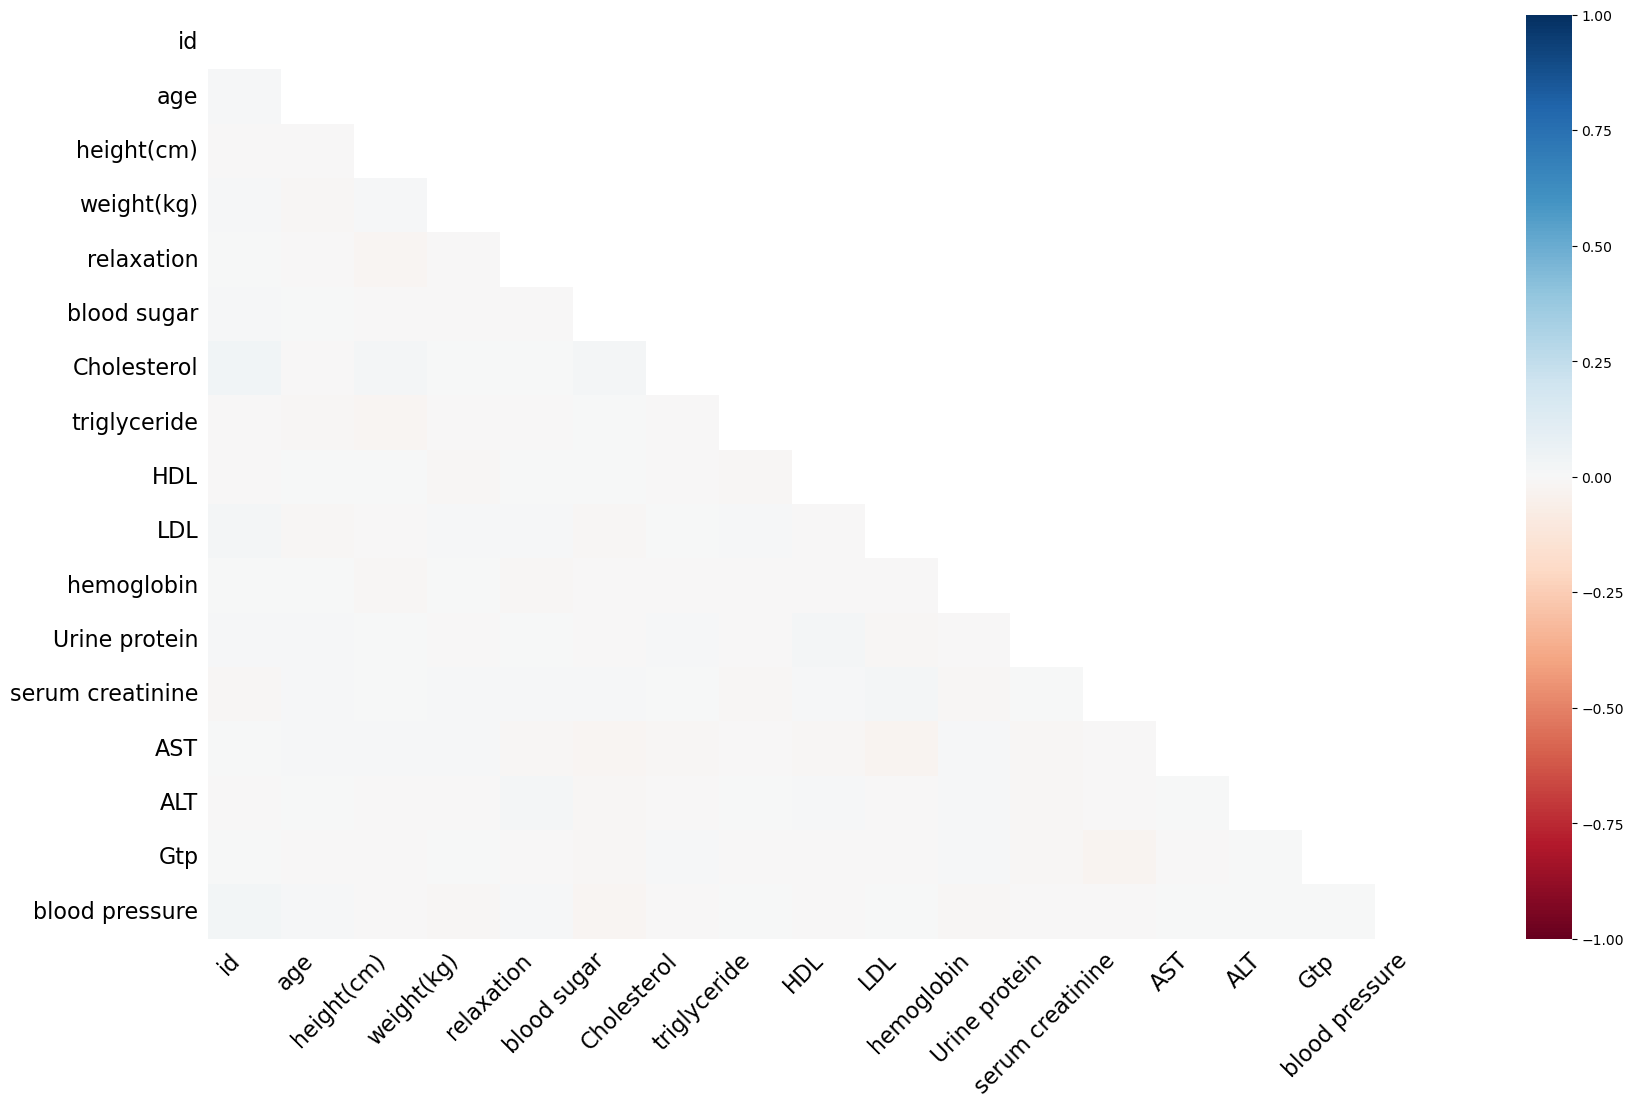

In [14]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(data)


<Axes: >

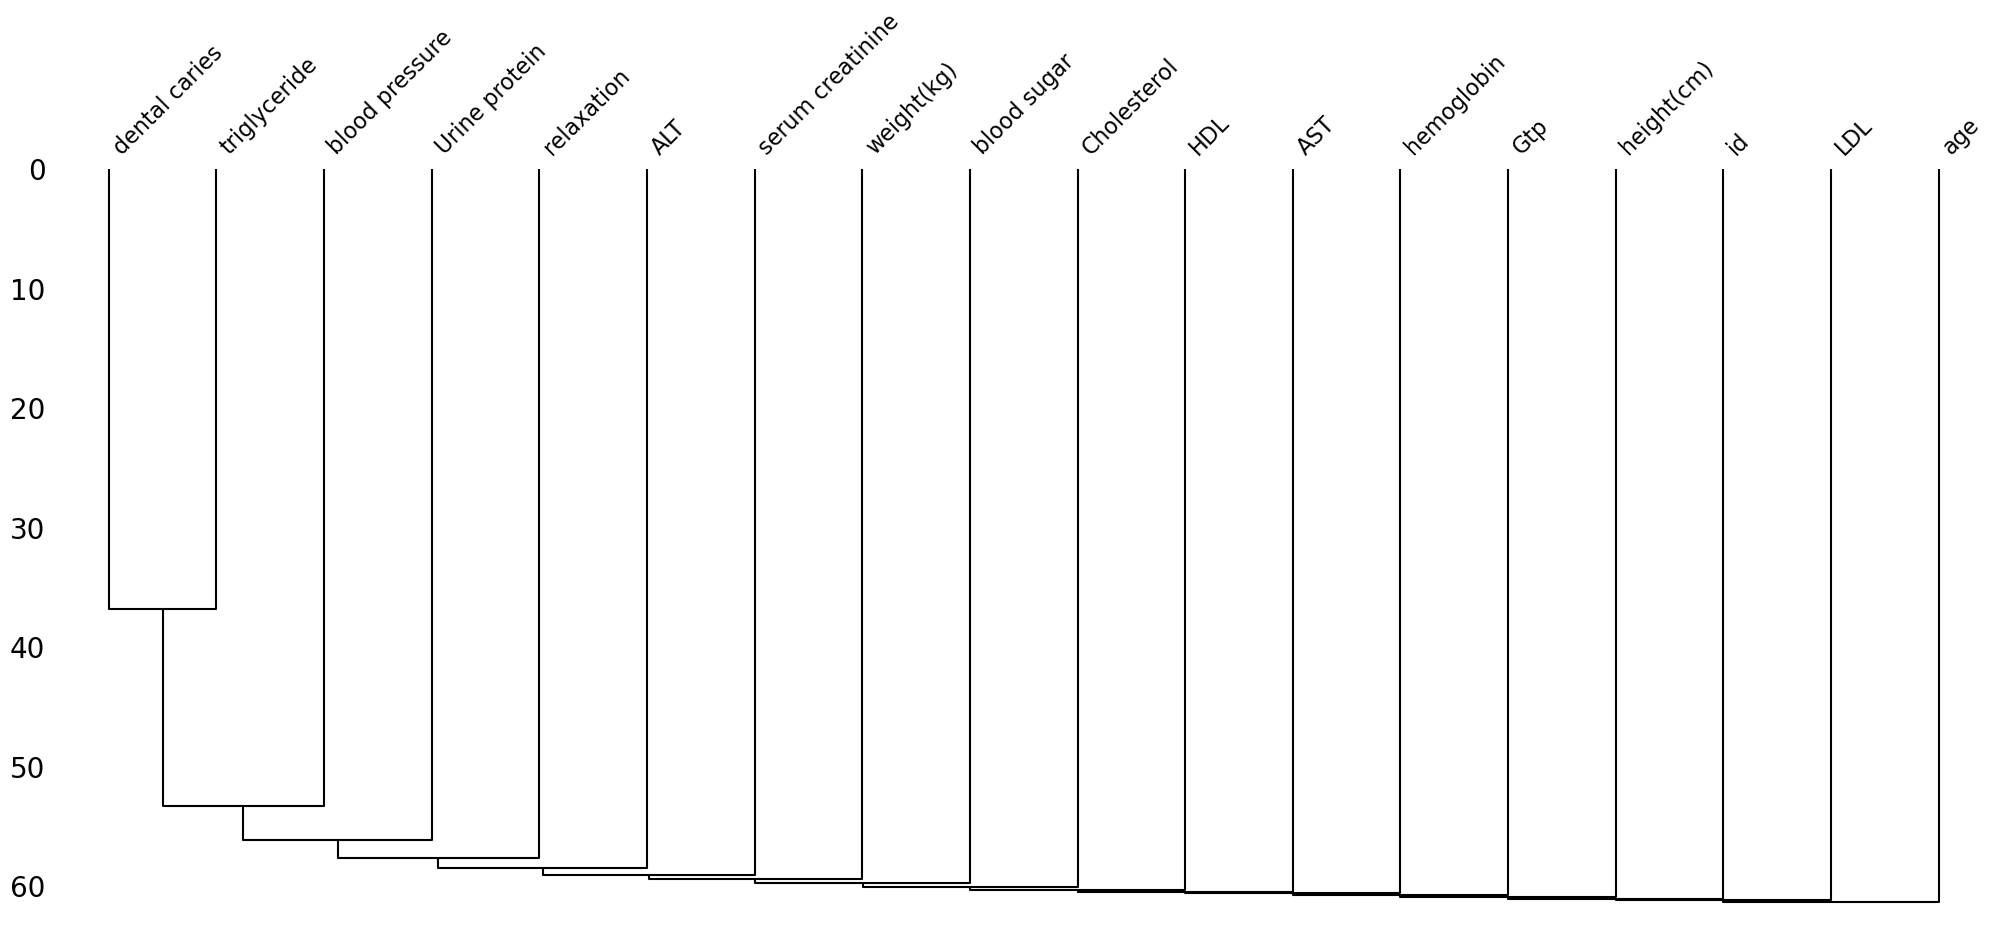

In [15]:
msno.dendrogram(data)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [17]:
# Write your code here. Add as many boxes as you need.
percent

id                  26.72
age                 26.88
height(cm)          26.27
weight(kg)          25.56
relaxation          25.75
blood sugar         25.62
Cholesterol         26.14
triglyceride        13.56
HDL                 26.09
LDL                 26.42
hemoglobin          25.83
Urine protein       25.25
serum creatinine    25.67
AST                 25.73
ALT                 25.84
Gtp                 25.89
dental caries        0.00
blood pressure      25.23
dtype: float64

In [18]:
data = data.drop(columns='id')

In [19]:
data

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,NaN,180.0,65.0,70.0,NaN,149.0,NaN,NaN,87.0,13.9,1.0,NaN,19.0,NaN,NaN,No,112.0
1,7/5/1979,150.0,50.0,88.0,92.0,219.0,LOW,NaN,137.0,13.2,NaN,0.6,26.0,17.0,NaN,No,138.0
2,11/27/1954,175.0,75.0,NaN,NaN,217.0,NORMAL,50.0,142.0,NaN,1.0,0.8,22.0,22.0,NaN,No,137.0
3,9/13/1984,160.0,NaN,NaN,100.0,160.0,HiGH,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,No,133.0
4,8/15/1984,170.0,NaN,68.0,99.0,176.0,LOW,NaN,96.0,13.8,1.0,0.9,33.0,NaN,11.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,180.0,75.0,69.0,100.0,180.0,ABNORMAL,76.0,98.0,14.7,NaN,0.8,29.0,39.0,73.0,No,120.0
9996,NaN,160.0,NaN,72.0,100.0,NaN,NORMAL,NaN,99.0,15.3,1.0,0.7,22.0,49.0,91.0,No,110.0
9997,8/3/1989,165.0,65.0,72.0,83.0,207.0,NaN,65.0,134.0,NaN,1.0,0.9,20.0,21.0,23.0,No,128.0
9998,NaN,160.0,75.0,82.0,88.0,NaN,HiGH,63.0,112.0,14.4,1.0,0.9,18.0,15.0,64.0,No,121.0


In [51]:
data.isnull().sum()

age                 2688
height(cm)          2627
weight(kg)          2556
relaxation          2575
blood sugar         2562
Cholesterol         2614
triglyceride        1356
HDL                 2609
LDL                 2642
hemoglobin          2583
Urine protein       2525
serum creatinine    2567
AST                 2573
ALT                 2584
Gtp                 2589
dental caries          0
blood pressure      2523
dtype: int64

In [53]:
from sklearn.impute import SimpleImputer

In [61]:
from datetime import datetime
import numpy as np  # To check for NaN values

def calculate_age_safe(birth_date):
    if pd.isna(birth_date):  
        return np.nan
    try:
        birth_date = datetime.strptime(birth_date, '%m/%d/%Y')
        today = datetime.today()
        return today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    except Exception:
        return np.nan

data['age'] = data['age'].apply(calculate_age_safe)


In [63]:
data.sample(10)

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
916,NaN,170.0,80.0,91.0,NaN,177.0,NORMAL,57.0,100.0,15.4,NaN,NaN,NaN,75.0,37.0,No,136.0
1636,60.0,165.0,65.0,NaN,NaN,213.0,UNK,34.0,140.0,NaN,3.0,NaN,NaN,20.0,61.0,Yes,107.0
4415,60.0,155.0,55.0,NaN,83.0,251.0,HiGH,55.0,164.0,14.5,1.0,0.7,31.0,27.0,NaN,No,108.0
5979,45.0,NaN,70.0,86.0,95.0,NaN,LOW,49.0,142.0,16.3,NaN,NaN,30.0,42.0,43.0,Yes,122.0
4719,55.0,165.0,NaN,83.0,114.0,209.0,NaN,51.0,122.0,15.9,1.0,NaN,24.0,NaN,25.0,No,124.0
3228,30.0,170.0,85.0,NaN,99.0,168.0,HiGH,45.0,93.0,14.7,NaN,0.9,26.0,28.0,NaN,No,123.0
5157,40.0,170.0,70.0,69.0,85.0,220.0,LOW,49.0,155.0,14.6,1.0,NaN,17.0,19.0,33.0,No,NaN
140,35.0,NaN,75.0,61.0,100.0,176.0,NORMAL,51.0,103.0,14.6,2.0,0.9,16.0,NaN,NaN,No,101.0
7141,65.0,150.0,55.0,70.0,92.0,135.0,LOW,45.0,NaN,13.9,1.0,1.0,25.0,22.0,18.0,No,100.0
5041,NaN,NaN,75.0,95.0,114.0,198.0,HiGH,NaN,98.0,16.8,1.0,NaN,16.0,19.0,69.0,Yes,138.0


In [73]:
from sklearn.preprocessing import LabelEncoder
def label_data(data,columns):
    encoder = LabelEncoder()
    data_copy = data.copy()

    for c in columns:
        data_copy[c] = encoder.fit_transform(data_copy[[c]].astype(str).values.ravel())

    return data_copy

In [55]:
def impute_data(data:pd.DataFrame, columns:list, strategy:str):
    imputer = SimpleImputer(strategy=strategy)
    data_copy = data.copy()

    for c in columns:
        data_copy[c] = imputer.fit_transform(data_copy[[c]])
    return data_copy

In [83]:
def drop_data(data,columns):
    data_copy = data.copy()
    data_copy.drop(columns,axis=1,inplace=True)
    return data_copy

In [69]:
data = impute_data(data=data, columns=['age','height(cm)','weight(kg)','relaxation','blood sugar','Cholesterol','HDL','LDL','hemoglobin','Urine protein','serum creatinine','AST','ALT','Gtp','blood pressure'], strategy='mean')
data.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
relaxation             0
blood sugar            0
Cholesterol            0
triglyceride        1356
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
blood pressure         0
dtype: int64

In [87]:
data = label_data(data=data,columns=['triglyceride','dental caries'])

In [89]:
data.isnull().sum()

age                 0
height(cm)          0
weight(kg)          0
relaxation          0
blood sugar         0
Cholesterol         0
triglyceride        0
HDL                 0
LDL                 0
hemoglobin          0
Urine protein       0
serum creatinine    0
AST                 0
ALT                 0
Gtp                 0
dental caries       0
blood pressure      0
dtype: int64

In [91]:
data.sample(20)

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
9516,45.292123,160.000000,65.000000,79.000000,126.000000,163.000000,3,57.000000,115.388285,14.000000,1.077726,0.600000,14.000000,25.411812,32.570099,0,121.000000
6791,31.000000,163.680998,55.000000,94.000000,97.870126,196.217845,4,72.000000,121.000000,13.900000,1.077726,1.100000,18.000000,16.000000,17.000000,0,132.000000
2489,40.000000,163.680998,65.355991,82.000000,94.000000,196.217845,1,56.000000,115.388285,13.700000,1.000000,0.800000,30.000000,57.000000,32.570099,1,122.138826
6908,45.292123,170.000000,65.355991,76.469091,90.000000,196.217845,3,49.000000,115.388285,15.300000,1.000000,1.100000,25.339572,44.000000,32.570099,1,128.000000
9848,45.292123,165.000000,75.000000,80.000000,97.870126,153.000000,4,57.371804,94.000000,14.900000,1.000000,1.200000,39.000000,63.000000,34.000000,0,122.138826
6186,70.000000,155.000000,65.355991,76.000000,102.000000,210.000000,5,54.000000,115.388285,14.567723,1.000000,0.800000,62.000000,51.000000,32.570099,1,129.000000
2212,55.000000,163.680998,45.000000,70.000000,174.000000,200.000000,4,65.000000,113.000000,12.300000,1.000000,0.872313,16.000000,16.000000,32.570099,0,116.000000
1331,45.292123,160.000000,70.000000,80.000000,91.000000,180.000000,3,46.000000,115.388285,15.600000,1.000000,1.200000,33.000000,64.000000,38.000000,0,130.000000
2777,45.292123,163.680998,45.000000,76.469091,99.000000,182.000000,2,57.371804,91.000000,13.200000,1.077726,0.800000,25.339572,18.000000,24.000000,0,156.000000
337,45.292123,155.000000,65.355991,80.000000,97.870126,220.000000,4,66.000000,115.388285,14.567723,1.000000,0.800000,25.339572,18.000000,14.000000,0,119.000000


## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [97]:
input_data = data.copy()
input_data = drop_data(data=input_data,columns=['blood pressure'])
input_data.sample(10)

,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
5921,40.000000,163.680998,65.355991,70.000000,80.000000,153.000000,4,52.000000,115.388285,13.800000,1.077726,0.600000,25.000000,18.000000,10.000000,0
6230,45.292123,163.680998,55.000000,60.000000,88.000000,189.000000,2,57.371804,111.000000,13.400000,1.077726,0.600000,15.000000,10.000000,32.570099,1
1104,50.000000,155.000000,45.000000,77.000000,84.000000,226.000000,3,82.000000,117.000000,13.500000,1.000000,0.700000,20.000000,25.411812,32.570099,0
9648,60.000000,160.000000,65.355991,76.469091,98.000000,185.000000,5,68.000000,99.000000,14.567723,1.077726,0.700000,18.000000,23.000000,22.000000,0
6486,30.000000,175.000000,60.000000,82.000000,85.000000,190.000000,1,53.000000,115.388285,15.900000,1.000000,0.872313,23.000000,19.000000,18.000000,0
8333,50.000000,163.680998,55.000000,70.000000,97.000000,196.217845,2,64.000000,94.000000,14.200000,1.000000,0.500000,33.000000,25.411812,10.000000,0
6287,40.000000,160.000000,65.355991,85.000000,110.000000,195.000000,3,47.000000,115.388285,13.200000,1.000000,0.600000,25.339572,17.000000,17.000000,0
2656,50.000000,155.000000,55.000000,82.000000,104.000000,254.000000,5,42.000000,175.000000,12.300000,1.077726,0.700000,29.000000,21.000000,32.570099,0
6896,40.000000,175.000000,90.000000,80.000000,92.000000,274.000000,0,57.371804,145.000000,15.800000,1.000000,0.872313,26.000000,35.000000,116.000000,1
1041,40.000000,165.000000,75.000000,76.469091,97.870126,175.000000,1,57.371804,90.000000,14.567723,1.077726,0.900000,28.000000,41.000000,32.570099,0


In [101]:
target_data = data.copy()['blood pressure']
target_data

0       112.000000
1       138.000000
2       137.000000
3       133.000000
4       122.138826
           ...    
9995    120.000000
9996    110.000000
9997    128.000000
9998    121.000000
9999    120.000000
Name: blood pressure, Length: 10000, dtype: float64

In [121]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(input_data, target_data, test_size=0.2)

## Model comparison with cross-validation

Train two models: XGBoost and RandomForest for predicting the target variable. Use 5-fold cross-validation to evaluate the performance of the models and compare them using adrquate metrics.

In [143]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(input_data, target_data, test_size=0.2)

xgb_model = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=2, n_estimators=10)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

xgb_cv_results = cross_validate(xgb_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=False)
rf_cv_results = cross_validate(rf_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=False)

xgb_model.fit(X_train, Y_train)
xgb_y_pred = xgb_model.predict(X_test)

rf_model.fit(X_train, Y_train)
rf_y_pred = rf_model.predict(X_test)

xgb_mse = -np.mean(xgb_cv_results['test_score']) 
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(Y_test, xgb_y_pred)

rf_mse = -np.mean(rf_cv_results['test_score'])
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(Y_test, rf_y_pred)

# Print evaluation metrics
print("XGBoost Model Performance:")
print(f"MSE: {xgb_mse}")
print(f"RMSE: {xgb_rmse}")
print(f"R2: {xgb_r2}")

print("\nRandomForest Model Performance:")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"R2: {rf_r2}")





XGBoost Model Performance:
MSE: 100.58911796560155
RMSE: 10.029412643101367
R2: 0.20865464725031868

RandomForest Model Performance:
MSE: 84.32228837118836
RMSE: 9.182716829522098
R2: 0.35951232278011047


# Cross-Validation

In [27]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the models by using different metrics provided by the `scikit-learn` library.

In [29]:
# Write your code here. Add as many boxes as you need.